### Catalog Analysis
Now we will want to create a catalog of objects that we have detected and give them labels. Here, Python can recognise the sjhapes of these objects and give us a bunch of useful data such as shape and flux.

In [17]:
# Importing modules
from photutils.segmentation import SourceCatalog
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils.segmentation import detect_sources
from photutils.segmentation import deblend_sources


Now we must open our data as we have done in the previous notebooks to obtain our deblended source map and the significance map. Then we can use a feature of Astropy which will generate a catalog of our data and include useful information such as shape and flux.

In [21]:

threshold=2.5

data = fits.open(f"../test_data/f200w_i2d.fits")   #Opening our file 

sci = data['SCI'].data  #Defining our science map
err = data['ERR'].data  #Defining our error map

sig=sci/err
seg_image=detect_sources(sig, threshold, npixels=5)  #Creating segmentation image
deblend_map=deblend_sources(sci,seg_image,npixels=5) #Using segmentation image to create deblended image

catalog=SourceCatalog(sci,deblend_map)  # This will generate our catalog of data which will be printed below.
print(catalog)
tbl = catalog.to_table() # This just converts the catalog data into a table for ease of viewing.
print("-------------------------")
print("Detected objects data table")

print(tbl)

<photutils.segmentation.catalog.SourceCatalog>
Length: 12
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12]
-------------------------
Detected objects data table
label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1  131.2251612945221 42.567004358706285 ... 10.347808103148976          nan
    2  54.78612103894989  55.97329837002083 ... 1.5464417755752402          nan
    3  170.7476646014529  67.12636163567338 ... 3.7933176917379487          nan
    4  186.8797125126409  83.04155883360092 ... 15.087278446927572          nan
    5  10.08098558633495 133.04878656623293 ...  1.672901059883062          nan
    6 168.64833951312576  135.3027150629075 ... 3.1537321028942027          nan
    7 140.39524391822027  196.5564656523536 ... 5.3908686545343745          nan
    8  81.97321030680497  50.6526277082059

So here is our table containing our data. We can now plot elipses around our maps known as Kron Apeteurs. 

Text(0.5, 1.0, 'Kron Apetures on Science map')

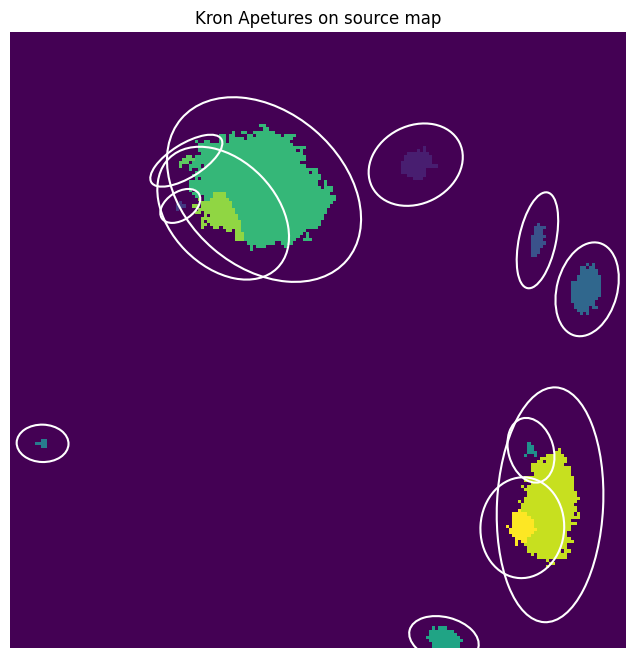

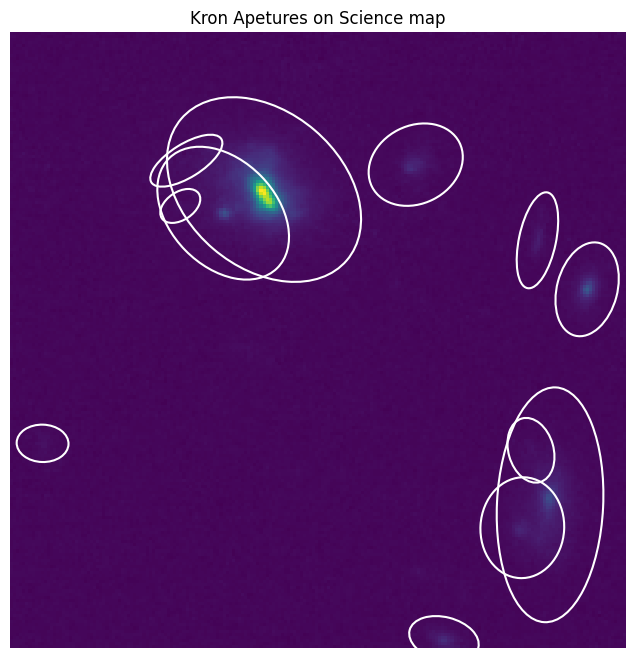

In [36]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
fig1,ax1=plt.subplots(1,1,figsize=(8,8))
ax.set_axis_off()
ax1.set_axis_off()
ax.imshow(deblend_map)
ax1.imshow(sci)
catalog.plot_kron_apertures(ax=ax, color='white', lw=1.5)
catalog.plot_kron_apertures(ax=ax1, color='white', lw=1.5)
ax.set_title("Kron Apetures on source map")
ax1.set_title("Kron Apetures on Science map")

